In [1]:
import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

In [2]:
os.listdir('Historical-Temp/')

['.DS_Store', 'avg-temp', 'temperature-change', 'zips']

In [3]:
# average temperature
datasource0 = os.listdir('Historical-Temp/avg-temp/')
# temperature change
datasource1 = os.listdir('Historical-Temp/temperature-change/')

In [4]:
datasource0

['GlobalLandTemperaturesByCountry.csv',
 '.DS_Store',
 'GlobalLandTemperaturesByMajorCity.csv',
 'GlobalLandTemperaturesByState.csv',
 'GlobalTemperatures.csv',
 'city_temperature.csv',
 'GlobalLandTemperaturesByCity.csv']

In [5]:
datasource1.remove('.DS_Store')
datasource0.remove('.DS_Store')

In [6]:
datasource1

['FAOSTAT_data_11-24-2020.csv',
 'Environment_Temperature_change_E_All_Data_NOFLAG.csv']

In [7]:
datasource0

['GlobalLandTemperaturesByCountry.csv',
 'GlobalLandTemperaturesByMajorCity.csv',
 'GlobalLandTemperaturesByState.csv',
 'GlobalTemperatures.csv',
 'city_temperature.csv',
 'GlobalLandTemperaturesByCity.csv']

In [8]:
# Reading Data

In [9]:
avgtemp_data ={}
tempchange_data = {}
for file in datasource0:
    avgtemp_data[file[:-4]] = pd.read_csv('Historical-Temp/avg-temp/{}'.format(file))
for file in datasource1:
    tempchange_data[file[:-4]] = pd.read_csv('Historical-Temp/temperature-change/{}'.format(file))
    
print(avgtemp_data.keys())
print(tempchange_data.keys())

/Users/rohan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


dict_keys(['GlobalLandTemperaturesByCountry', 'GlobalLandTemperaturesByMajorCity', 'GlobalLandTemperaturesByState', 'GlobalTemperatures', 'city_temperature', 'GlobalLandTemperaturesByCity'])
dict_keys(['FAOSTAT_data_11-24-2020', 'Environment_Temperature_change_E_All_Data_NOFLAG'])


In [10]:
avgtemp_data['GlobalLandTemperaturesByState']

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China


In [11]:
avgtemp_data['GlobalLandTemperaturesByMajorCity']

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [12]:
tempchange_data['Environment_Temperature_change_E_All_Data_NOFLAG']

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,�C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,�C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,�C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,�C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,�C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,5873,OECD,7018,Jun�Jul�Aug,6078,Standard Deviation,�C,0.247,0.247,0.247,...,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247
9652,5873,OECD,7019,Sep�Oct�Nov,7271,Temperature change,�C,0.036,0.461,0.665,...,0.958,1.106,0.885,1.041,0.999,1.670,1.535,1.194,0.581,1.233
9653,5873,OECD,7019,Sep�Oct�Nov,6078,Standard Deviation,�C,0.378,0.378,0.378,...,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378
9654,5873,OECD,7020,Meteorological year,7271,Temperature change,�C,0.165,-0.009,0.134,...,1.246,0.805,1.274,0.991,0.811,1.282,1.850,1.349,1.088,1.297


### List of sources to be used
***
* GlobalLandTemperaturesByMajorCity
* GlobalLandTemperaturesByState
* Environment_Temperature_change_E_All_Data_NOFLAG

In [13]:
dmajcity = avgtemp_data['GlobalLandTemperaturesByMajorCity'].copy(deep=True)
dstate = avgtemp_data['GlobalLandTemperaturesByState'].copy(deep=True)
dtempchange = tempchange_data['Environment_Temperature_change_E_All_Data_NOFLAG'].copy(deep=True)

### Missing Value Estimations

In [14]:
labels = ['MajorCity Data', 'Statewise Data', 'Temperature Change Data']

Text(0.5, 1.0, 'Total Missing Values')

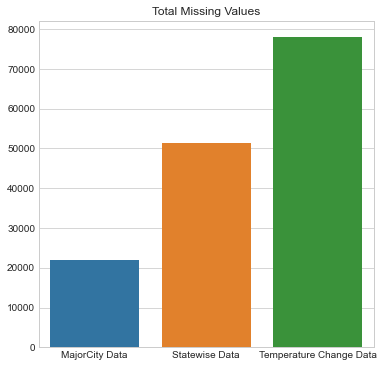

In [15]:
# hue = [dmajcity.shape[0], dstate.shape[0], dtempchange.shape[0]]
plt.figure(figsize=(6,6))
mvalues = [dmajcity.isna().sum().sum(), dstate.isna().sum().sum().sum(), dtempchange.isna().sum().sum()]
sns.barplot(x=labels,y=mvalues)
plt.title('Total Missing Values')

<AxesSubplot:title={'center':'Major City Column-wise Missing Values'}>

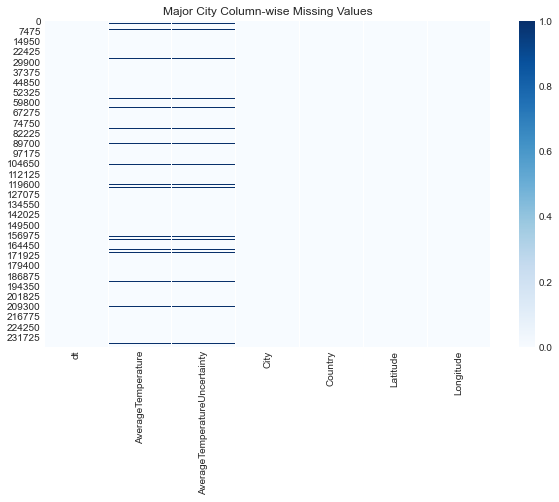

In [16]:
plt.figure(figsize=(10,6))
plt.title('Major City Column-wise Missing Values')
sns.heatmap(dmajcity.isna(),cmap='Blues')

<AxesSubplot:title={'center':'State Data Column-wise Missing Values'}>

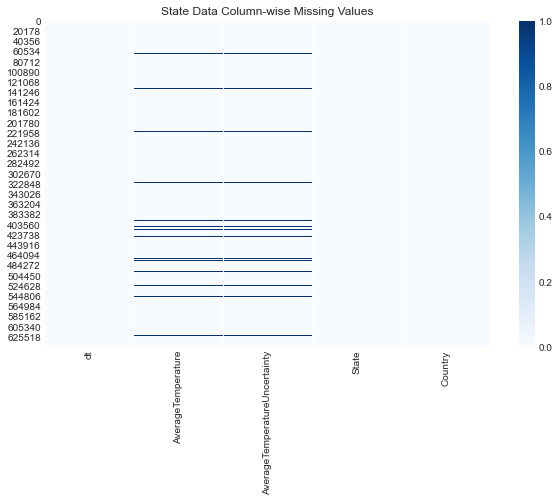

In [17]:
plt.figure(figsize=(10,6))
plt.title('State Data Column-wise Missing Values')
sns.heatmap(dstate.isna(),cmap='Blues')

<AxesSubplot:title={'center':'Temp Change Data Column-wise Missing Values'}>

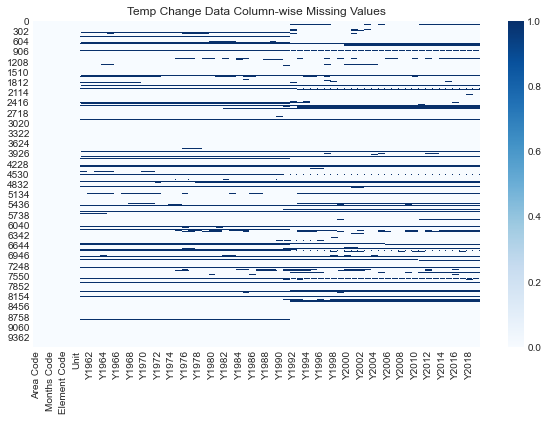

In [18]:
plt.figure(figsize=(10,6))
plt.title('Temp Change Data Column-wise Missing Values')
sns.heatmap(dtempchange.isna(),cmap='Blues')

In [19]:
# percentage missing

In [20]:
dmjp = (dmajcity.isna().sum().sum()/ dmajcity.size)*100
dst = (dstate.isna().sum().sum()/ dstate.size)*100
dtc = (dtempchange.isna().sum().sum()/ dtempchange.size)*100

In [21]:
for var,val in zip(['Major City','States', 'Temperature Change'],[dmjp, dst, dtc]):
    print('Percentage Missing in {} data : {:.2f}%'.format(var,val))

Percentage Missing in Major City data : 1.31%
Percentage Missing in States data : 1.59%
Percentage Missing in Temperature Change data : 12.26%


In [22]:
# basic overview

In [23]:
dmajcity.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,228175.000000,228175.000000
mean,18.125969,0.969343
std,10.024800,0.979644
min,-26.772000,0.040000
25%,12.710000,0.340000
50%,20.428000,0.592000
75%,25.918000,1.320000
max,38.283000,14.037000


In [24]:
dstate.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,620027.000000,620027.000000
mean,8.993111,1.287647
std,13.772150,1.360392
min,-45.389000,0.036000
25%,-0.693000,0.316000
50%,11.199000,0.656000
75%,19.899000,1.850000
max,36.339000,12.646000


In [25]:
dtempchange.describe()

,Area Code,Months Code,Element Code,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
count,9656.000000,9656.000000,9656.00000,8287.000000,8322.000000,8294.000000,8252.000000,8281.000000,8364.000000,8347.000000,...,8435.000000,8437.000000,8350.000000,8427.000000,8377.000000,8361.000000,8348.000000,8366.000000,8349.000000,8365.000000
mean,821.806338,7009.882353,6674.50000,0.402433,0.315527,0.317393,0.269382,0.217839,0.376419,0.263239,...,0.884504,0.768488,0.788930,0.829647,0.913872,1.018816,1.081491,1.003342,1.010832,1.094599
std,1781.072213,6.038255,596.53089,0.701567,0.713777,0.853133,0.749216,0.739418,0.737370,0.725421,...,0.878303,0.750631,0.858586,0.713753,0.815933,0.840189,0.877399,0.809800,0.872199,0.853953
min,1.000000,7001.000000,6078.00000,-4.018000,-5.391000,-8.483000,-7.309000,-4.728000,-8.147000,-6.531000,...,-6.072000,-4.854000,-5.785000,-3.642000,-5.367000,-4.068000,-3.306000,-3.584000,-2.216000,-2.644000
25%,78.000000,7005.000000,6078.00000,0.057000,-0.033000,0.030250,-0.102500,-0.214000,0.055000,-0.169000,...,0.392000,0.365000,0.372250,0.408500,0.418000,0.437000,0.457000,0.443000,0.434000,0.455000
50%,153.500000,7009.000000,6674.50000,0.366000,0.333000,0.355000,0.326000,0.303000,0.360000,0.313000,...,0.771000,0.640000,0.651000,0.719000,0.745000,0.858000,0.949000,0.865000,0.810000,0.939000
75%,226.250000,7016.000000,7271.00000,0.676500,0.627000,0.647750,0.609000,0.584000,0.660250,0.601000,...,1.276500,1.091000,1.108000,1.126000,1.190000,1.389000,1.496000,1.364750,1.341000,1.508000
max,5873.000000,7020.000000,7271.00000,5.771000,4.373000,4.666000,5.233000,5.144000,5.771000,4.768000,...,7.190000,6.531000,10.826000,6.738000,11.759000,7.590000,10.478000,7.389000,9.228000,7.215000


## **Data Aggregation**

### CityWise Mean Imputation

#### __ToDo__
***
* Take the entire dataset 
* Slice-1: Country slice and pass to function iteratively 
* Slice-2: Iterative City wise datasheets impute mean and append that to list, concat and return 
* Slice-3: catch the returned df and append to list 
* Concat Final Df : countrywise


In [26]:
countries = dmajcity['Country'].unique()

In [39]:
'''
`Doc String`
* In a Normal Scenario the missing values would have been imputed with the repective mean 
values relative to the column, but this data deals with the average temperatures particular
to a region.
* The Data is split on each country and passed to a function which further splits the data
by City then imputes the mean values for the columns 
* This CityWise Data is concatenated on axis=0 and returned 
* This CityWise-Country Data is appened to a list which is then concatenated on axis=0 to 
get the original data with the imputations performed.
'''


def mean_imputation(df,loc='City'):
    locdfs = []
    locations = df[loc].unique()
    for lc in locations: 
        locdf = df[df[loc] == lc]
        locdf['AverageTemperature'] = locdf['AverageTemperature'].fillna(locdf['AverageTemperature'].mean())
        locdf['AverageTemperatureUncertainty']= locdf['AverageTemperatureUncertainty'].fillna(locdf['AverageTemperatureUncertainty'].mean())
        locdfs.append(locdf)
    concatdf = pd.concat(locdfs, axis=0, ignore_index=True)
    return concatdf

In [40]:
countrywisedfs = []
for country in countries:
    df = dmajcity[dmajcity['Country']==country]
    cityconcatdf = mean_imputation(df,loc='City')
    countrywisedfs.append(cityconcatdf)
dmajcity = pd.concat(countrywisedfs, axis=0).copy(deep=True)


<ipython-input-39-094253d248e5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locdf['AverageTemperature'] = locdf['AverageTemperature'].fillna(locdf['AverageTemperature'].mean())
<ipython-input-39-094253d248e5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locdf['AverageTemperatureUncertainty']= locdf['AverageTemperatureUncertainty'].fillna(locdf['AverageTemperatureUncertainty'].mean())


In [41]:
dmajcity.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
Month                            0
Year                             0
dtype: int64

In [42]:
dmajcity

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month,Year
0,1849-01-01,26.704000,1.435000,Abidjan,Côte D'Ivoire,5.63N,3.23W,Jan,1849
1,1849-02-01,27.434000,1.362000,Abidjan,Côte D'Ivoire,5.63N,3.23W,Feb,1849
2,1849-03-01,28.101000,1.612000,Abidjan,Côte D'Ivoire,5.63N,3.23W,Mar,1849
3,1849-04-01,26.140000,1.387000,Abidjan,Côte D'Ivoire,5.63N,3.23W,Apr,1849
4,1849-05-01,25.427000,1.200000,Abidjan,Côte D'Ivoire,5.63N,3.23W,May,1849
...,...,...,...,...,...,...,...,...,...
1852,2013-05-01,35.285000,0.298000,Umm Durman,Sudan,15.27N,32.50E,May,2013
1853,2013-06-01,34.516000,0.302000,Umm Durman,Sudan,15.27N,32.50E,Jun,2013
1854,2013-07-01,31.496000,1.322000,Umm Durman,Sudan,15.27N,32.50E,Jul,2013
1855,2013-08-01,31.159000,1.333000,Umm Durman,Sudan,15.27N,32.50E,Aug,2013


### Statewise data Mean Imputation

In [50]:
countrywisedfs = []
countries = dstate['Country'].unique()
for country in countries:
    df = dstate[dstate['Country']==country]
    cityconcatdf = mean_imputation(df,loc='State')
    countrywisedfs.append(cityconcatdf)
dstate = pd.concat(countrywisedfs, axis=0).copy(deep=True)


<ipython-input-39-094253d248e5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locdf['AverageTemperature'] = locdf['AverageTemperature'].fillna(locdf['AverageTemperature'].mean())
<ipython-input-39-094253d248e5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locdf['AverageTemperatureUncertainty']= locdf['AverageTemperatureUncertainty'].fillna(locdf['AverageTemperatureUncertainty'].mean())


In [52]:
dstate.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
State                            0
Country                          0
dtype: int64

### Timeseries

In [43]:
# Date Time Object 
months = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',
         11:'Nov',12:'Dec'}
dmajcity['dt'] = pd.to_datetime(dmajcity['dt'])
dmajcity['Month'] = dmajcity['dt'].dt.month.map(months)
dmajcity['Year'] = dmajcity['dt'].dt.year
dmajcity

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month,Year
0,1849-01-01,26.704000,1.435000,Abidjan,Côte D'Ivoire,5.63N,3.23W,Jan,1849
1,1849-02-01,27.434000,1.362000,Abidjan,Côte D'Ivoire,5.63N,3.23W,Feb,1849
2,1849-03-01,28.101000,1.612000,Abidjan,Côte D'Ivoire,5.63N,3.23W,Mar,1849
3,1849-04-01,26.140000,1.387000,Abidjan,Côte D'Ivoire,5.63N,3.23W,Apr,1849
4,1849-05-01,25.427000,1.200000,Abidjan,Côte D'Ivoire,5.63N,3.23W,May,1849
...,...,...,...,...,...,...,...,...,...
1852,2013-05-01,35.285000,0.298000,Umm Durman,Sudan,15.27N,32.50E,May,2013
1853,2013-06-01,34.516000,0.302000,Umm Durman,Sudan,15.27N,32.50E,Jun,2013
1854,2013-07-01,31.496000,1.322000,Umm Durman,Sudan,15.27N,32.50E,Jul,2013
1855,2013-08-01,31.159000,1.333000,Umm Durman,Sudan,15.27N,32.50E,Aug,2013


In [44]:
india = dmajcity[dmajcity['Country']=='India']

In [45]:
india.groupby('City')[['AverageTemperature','AverageTemperatureUncertainty']].describe()

AverageTemperature                                               \
                       count       mean       std     min     25%     50%   
City                                                                        
Ahmadabad             2613.0  26.529853  4.124157  16.792  23.401  27.021   
Bangalore             2613.0  24.855896  1.828932  20.257  23.569  24.620   
Bombay                2613.0  26.631452  1.576221  21.010  25.610  26.783   
Calcutta              2613.0  26.042152  4.162208  15.253  22.515  27.568   
Delhi                 2613.0  25.165861  6.474863  11.378  19.724  25.754   
Hyderabad             2613.0  26.869335  3.251038  19.576  24.602  26.741   
Jaipur                2613.0  25.393058  5.886170  12.779  20.410  25.988   
Kanpur                2613.0  24.760041  6.197732  11.686  19.177  25.427   
Lakhnau               2613.0  24.760041  6.197732  11.686  19.177  25.427   
Madras                2613.0  28.417858  2.811740  21.596  25.833  28.508   
Nagpur                2613.0  25.655016  4.589056  15.881  21.714  25.752   
New Delhi             2613.0  25.165861  6.474863  11.378  19.724  25.754   
Pune                  2613.0  24.644615  2.944379  17.598  22.558  24.589   
Surat                 2613.0  26.330856  3.748381  17.647  23.222  26.865   

                          AverageTemperatureUncertainty                      \
              75%     max                         count      mean       std   
City                                                                          
Ahmadabad  29.285  35.419                        2613.0  0.950915  0.737967   
Bangalore  26.004  29.688                        2613.0  0.912482  0.878076   
Bombay     27.724  30.682                        2613.0  0.940125  0.741583   
Calcutta   29.260  32.815                        2613.0  0.880382  0.842442   
Delhi      30.244  36.339                        2613.0  0.948583  0.769144   
Hyderabad  29.170  34.701                        2613.0  0.956286  0.855345   
Jaipur     29.729  36.477                        2613.0  0.951544  0.779999   
Kanpur     29.578  35.618                        2613.0  0.962135  0.762582   
Lakhnau    29.578  35.618                        2613.0  0.962135  0.762582   
Madras     30.574  34.587                        2613.0  0.999483  0.942429   
Nagpur     27.951  36.052                        2613.0  0.954469  0.802513   
New Delhi  30.244  36.339                        2613.0  0.948583  0.769144   
Pune       26.602  31.700                        2613.0  0.945582  0.774041   
Surat      28.925  34.211                        2613.0  0.933880  0.752593   

                                              
             min    25%    50%    75%    max  
City                                          
Ahmadabad  0.106  0.395  0.649  1.475  5.498  
Bangalore  0.084  0.320  0.540  1.221  6.726  
Bombay     0.134  0.388  0.657  1.363  5.807  
Calcutta   0.056  0.290  0.484  1.347  7.781  
Delhi      0.079  0.377  0.611  1.488  5.548  
Hyderabad  0.082  0.363  0.615  1.323  6.913  
Jaipur     0.112  0.366  0.601  1.562  5.551  
Kanpur     0.089  0.400  0.646  1.446  6.085  
Lakhnau    0.089  0.400  0.646  1.446  6.085  
Madras     0.114  0.383  0.639  1.269  7.334  
Nagpur     0.106  0.366  0.611  1.461  6.478  
New Delhi  0.079  0.377  0.611  1.488  5.548  
Pune       0.109  0.375  0.643  1.378  6.086  
Surat      0.103  0.374  0.598  1.463  5.738

In [46]:
hyddf = india[india['City'] == 'Hyderabad']

In [47]:
yearavgs = []
for year in hyddf['Year'].unique():
    yearavgs.append(hyddf[hyddf['Year']==year]['AverageTemperature'].mean())

In [48]:
hyddf

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month,Year
13065,1796-01-01,22.759000,2.322000,Hyderabad,India,16.87N,78.70E,Jan,1796
13066,1796-02-01,25.094000,1.453000,Hyderabad,India,16.87N,78.70E,Feb,1796
13067,1796-03-01,27.725000,2.443000,Hyderabad,India,16.87N,78.70E,Mar,1796
13068,1796-04-01,31.280000,1.789000,Hyderabad,India,16.87N,78.70E,Apr,1796
13069,1796-05-01,32.701000,1.406000,Hyderabad,India,16.87N,78.70E,May,1796
...,...,...,...,...,...,...,...,...,...
15673,2013-05-01,34.650000,0.823000,Hyderabad,India,16.87N,78.70E,May,2013
15674,2013-06-01,29.487000,0.754000,Hyderabad,India,16.87N,78.70E,Jun,2013
15675,2013-07-01,27.011000,0.478000,Hyderabad,India,16.87N,78.70E,Jul,2013
15676,2013-08-01,26.923000,0.413000,Hyderabad,India,16.87N,78.70E,Aug,2013


Text(0, 0.5, 'Average Temperatures')

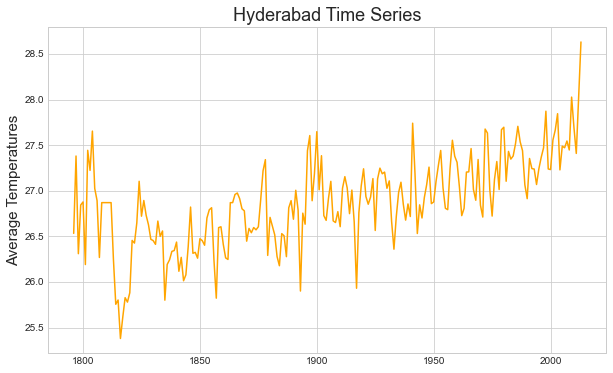

In [57]:
plt.figure(figsize=(10,6))
sns.lineplot(x=hyddf['Year'].unique(),y=yearavgs,color='orange')
plt.title('Hyderabad Time Series',size=18)
plt.ylabel('Average Temperatures',size=15)